<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076   
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798   
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711   
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927   
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406   
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980   
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466   
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.761648  0.018428  
      1.0     98.012296 -0.028402  
      2.0    143.594859  0.009938  
      3.0    196.919829  0.006882  
      4.0    212.163047 -0.010895  
...                 ...       ...  
999.0 245.0  202.083509 -0.039582  
      246.0  179.921655 -0.001250  
      247.0  174.345450  0.010529  
      248.0  228.414964  0.010502  
      249.0  148.137020  0.015156  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076   
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798   
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711   
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927   
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406   
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980   
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466   
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.761648  0.018428  
      1.0     98.012296 -0.028402  
      2.0    143.594859  0.009938  
      3.0    196.919829  0.006882  
      4.0    212.163047 -0.010895  
...                 ...       ...  
999.0 245.0  202.083509 -0.039582  
      246.0  179.921655 -0.001250  
      247.0  174.345450  0.010529  
      248.0  228.414964  0.010502  
      249.0  148.137020  0.015156  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076   
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798   
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711   
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927   
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406   
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980   
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466   
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.761648  0.018428  
      1.0     98.012296 -0.028402  
      2.0    143.594859  0.009938  
      3.0    196.919829  0.006882  
      4.0    212.163047 -0.010895  
...                 ...       ...  
999.0 245.0  202.083509 -0.039582  
      246.0  179.921655 -0.001250  
      247.0  174.345450  0.010529  
      248.0  228.414964  0.010502  
      249.0  148.137020  0.015156  

[250000 rows x 7 columns]

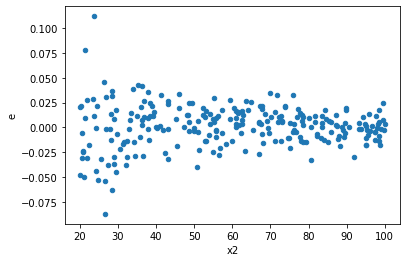

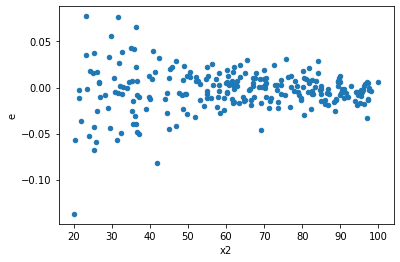

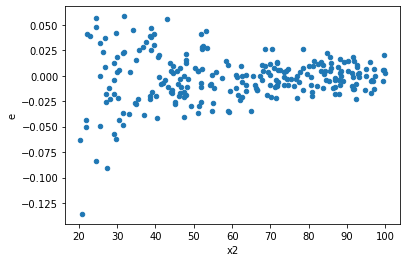

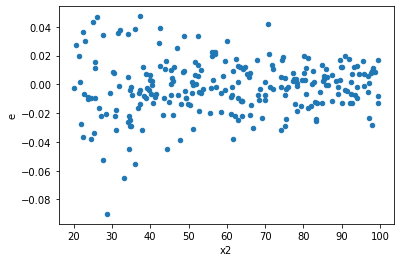

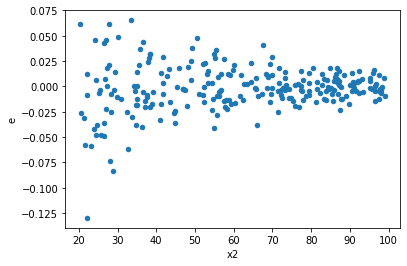

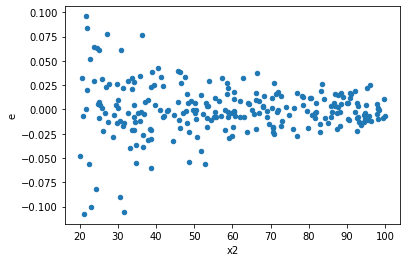

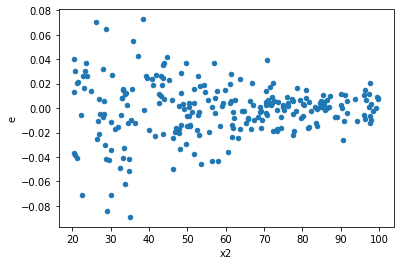

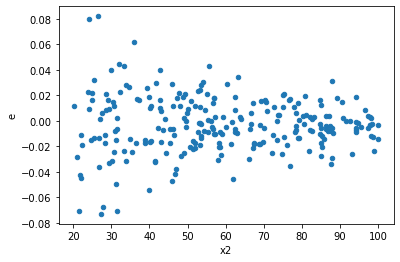

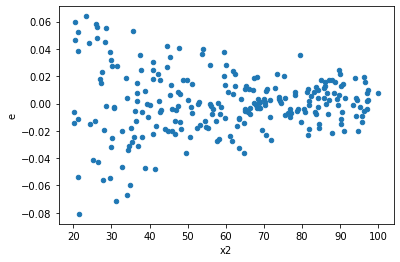

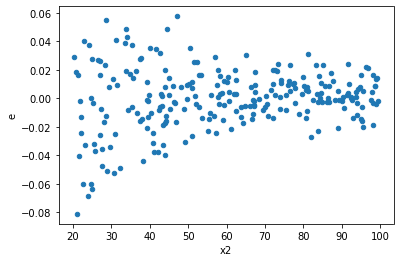

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,134.0,110.0,0.033721336403246094,0.09525942760582119,0.00025165176420332907,0.0008659947964165563,3.4412426996412853,1.0841039177478251e-10,0.9999999999457948,5.4205195887391255e-11,Reject001=0 : Heteroscedasticity
2.0,123.0,121.0,0.04132347956062722,0.09727537386145067,0.00033596324846038394,0.0008039287095987659,2.3929067041794707,2.2489313742379835e-06,0.9999988755343129,1.1244656871189918e-06,Reject001=0 : Heteroscedasticity
4.0,141.0,103.0,0.04138730253047687,0.08309170496395121,0.0002935269683012544,0.0008067155821742837,2.748352517123164,1.4760899169630193e-07,0.9999999261955042,7.380449584815096e-08,Reject001=0 : Heteroscedasticity
8.0,122.0,122.0,0.03974485483984741,0.08912285672340153,0.00032577749868727384,0.0007305152190442748,2.2423746943478258,1.1210200570266338e-05,0.9999943948997149,5.605100285133169e-06,Reject001=0 : Heteroscedasticity
11.0,119.0,125.0,0.03266927896575263,0.08085028091495754,0.00027453175601472793,0.0006468022473196603,2.356019779675183,3.016983178172339e-06,0.9999984915084109,1.5084915890861694e-06,Reject001=0 : Heteroscedasticity
15.0,121.0,123.0,0.02299558450429705,0.07541957711507986,0.0001900461529280748,0.0006131672936185355,3.2264125538526205,3.087430311410344e-10,0.9999999998456285,1.543715155705172e-10,Reject001=0 : Heteroscedasticity
17.0,109.0,135.0,0.018033911259808133,0.09826205920933055,0.00016544872715420307,0.0007278671052543004,4.399351495620192,1.3322676295501878e-15,0.9999999999999993,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
19.0,121.0,123.0,0.02724394594511455,0.07625864007957993,0.00022515657805879794,0.0006199889437364222,2.753590186356966,4.3182465825353233e-08,0.9999999784087671,2.1591232912676617e-08,Reject001=0 : Heteroscedasticity
20.0,137.0,107.0,0.043277541012689436,0.08738868763607237,0.0003158944599466382,0.000816716706879181,2.5854100354186116,5.626219752308259e-07,0.9999997186890124,2.8131098761541296e-07,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,116.0,128.0,0.07012777363630278,0.03958791470648436,0.0006045497727267481,0.00030928058364440905,0.5115882886688331,0.00027963436886263576,Reject001=0 : Heteroscedasticity
1.0,134.0,110.0,0.033721336403246094,0.09525942760582119,0.00025165176420332907,0.0008659947964165563,3.4412426996412853,1.0841039177478251e-10,Reject001=0 : Heteroscedasticity
2.0,123.0,121.0,0.04132347956062722,0.09727537386145067,0.00033596324846038394,0.0008039287095987659,2.3929067041794707,2.2489313742379835e-06,Reject001=0 : Heteroscedasticity
3.0,136.0,108.0,0.06673544020993284,0.02289661328546302,0.0004907017662495062,0.00021200567856910206,0.4320458843861262,4.052454588390022e-06,Reject001=0 : Heteroscedasticity
4.0,141.0,103.0,0.04138730253047687,0.08309170496395121,0.0002935269683012544,0.0008067155821742837,2.748352517123164,1.4760899169630193e-07,Reject001=0 : Heteroscedasticity
5.0,97.0,147.0,0.10222963162992037,0.07119732348043302,0.0010539137281435089,0.00048433553388049674,0.45955899515007165,5.61179350087651e-05,Reject001=0 : Heteroscedasticity
6.0,141.0,103.0,0.09625837406534944,0.02940111005187092,0.0006826835040095705,0.00028544767040651376,0.4181259232572757,1.6688718846407689e-06,Reject001=0 : Heteroscedasticity
7.0,153.0,91.0,0.09036854133467491,0.025906878352600256,0.0005906440610109471,0.0002846909709076951,0.4820009032519817,6.726382361749098e-05,Reject001=0 : Heteroscedasticity
8.0,122.0,122.0,0.03974485483984741,0.08912285672340153,0.00032577749868727384,0.0007305152190442748,2.2423746943478258,1.1210200570266338e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    917
Reject001=1 : Homoscedasticity       83
Name: Result_test, dtype: int64